In [299]:
import numpy as np 
import matplotlib.pyplot as plt
import math
import scipy
from scipy import special
import time
from time import strftime, gmtime
from tqdm.auto import tqdm, trange
from tqdm import tqdm

import concurrent.futures
import multiprocessing
num_processes = multiprocessing.cpu_count()

%matplotlib inline


Vamos definir as constantes e as funções necessárias

In [348]:
pi = math.pi # Constante pi


Lambda = np.double(0.01)
rs = np.double(3.0)


distancia_total = 5.0*rs

N = 500 # Discretização da distância radial r 

dr = np.double(distancia_total/N)  # Tamanho do diferencial

dt = np.double(0.01)


# O potencial gaussiano
def v( r):
  r = np.double(r)
  return math.exp(-pow(r,2.0)/2.0)


# A função modificada de Bessel de ordem 0
def integracao_angular( x):
  return scipy.special.i0( x)


# O integrando
def integrando( dr, i, j):

  if (i*dr<7.0) & (j*dr<7.0):
    aux = (2.0*pi)*dr*dr*math.exp( -(pow(i*dr, 2.0)+pow(j*dr, 2.0))/2.0 )*\
    integracao_angular( (i*dr)*(j*dr) )*(f[i]*f[i]-1.0)*f[j]
    return aux
  else:
    return 0


# Segunda derivada de três pontos

def derivada_segunda( dr, y_anterior, y_0, y_posterior):

  derivada = (y_posterior+y_anterior-2.0*y_0)/(dr*dr)

  return derivada



O texto principal do código. Antes de tudo, o tempo de atualizações ```t_max``` 
deve ser informado


In [349]:
t_max = 100 # O número máximo de atualizações de f pela H

In [365]:
start_time = time.time()


F = np.array([np.double(0.0)]*N)
f = np.array([np.double(1.0)]*N)   # Condição inicial

termo_interacao = np.double(0.0)


for t in range(1,t_max):
  
  termo_interacao = 0.0
  
  # Calcula a integral e F em i=0 (r=0), assumindo que f[i<0]=0 
  for i in range(0,len(f)-1):

    termo_interacao += integrando(dr,i,0)
  
  # F no primeiro ponto de r
  F[0] = -(Lambda/(2.0*rs*rs))*derivada_segunda(dr,f[0],f[0],f[0]) + v(0.0)*f[0] +\
  termo_interacao


  
  # Calcula F para os demais pontos i>0

  for i in range(1,len(f)-1):

    termo_interacao = 0.0 
    
    for j in range(0,len(f)-1):
      termo_interacao += integrando(dr,j,i)
    

    # F para i>0
    F[i] = -(Lambda/(2.0*rs*rs))*derivada_segunda(dr,f[i-1],f[i],f[i+1]) + \
    v(i*dr)*f[i] + termo_interacao

  # Atualização de f: 

  f = f - dt*F

  f[f<0.0] = 0

  f[-1] = 1.0 # O último ponto deve continuar sendo igual a 1.0


elapsed_time = time.time() - start_time
print("Tempo de processamento: "+str(strftime("%H:%M:%S", gmtime(elapsed_time))))

final_f = np.copy(f)
final_F = np.copy(F)

del f, F



Tempo de processamento: 00:00:55


O plot: 

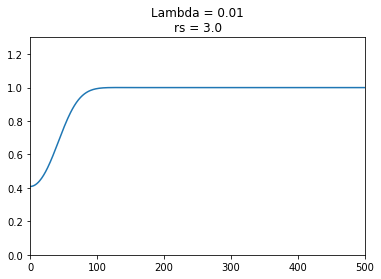

In [366]:
plt.plot(final_f)
plt.xlim(0, 500)
plt.title("Lambda = "+ str(Lambda) + "\n" + "rs = " + str(rs))
plt.ylim(0, 1.3*np.amax(final_f))
plt.show()

In [270]:

def integracao_angular2(x):
  if (abs(x)< 3.75):
    y=x/3.75
    y = y*y
    ans=1.0+y*(3.5156229+y*(3.0899424+y*(1.2067492+y*(0.2659732+y*(0.360768e-1+y*0.45813e-2)))))
  else:
    y=3.75/x
    ans=(math.exp(x)/math.sqrt(x))*(0.39894228+y*(0.1328592e-1+y*(0.225319e-2+y*(-0.157565e-2+y*(0.916281e-2+y*(-0.2057706e-1+y*(0.2635537e-1+y*(-0.1647633e-1+y*0.392377e-2))))))))
  
  return ans





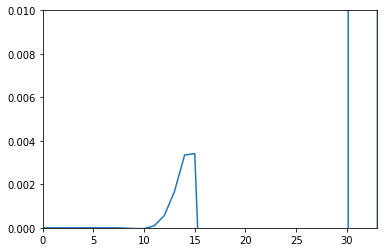

In [171]:
f = np.array([0.0]*10000)

n = 33

for i in range(1,n):
  aux1 = integracao_angular(np.double(i))
  aux2 = integracao_angular2(float(i))
  f[i] = (aux1-aux2)

plt.plot(f)
plt.xlim(0, n) 
plt.ylim(0, 0.01)
plt.show()

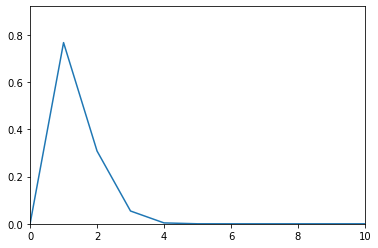

In [175]:
f = np.array([0.0]*10000)

n = 10


for i in range(1,n):
  aux1 = integracao_angular(float(i))
  aux2 = v(i)
  f[i] = aux1*aux2

plt.plot(f)
plt.xlim(0, n)
 
plt.ylim(0, 1.2*np.amax(f))
plt.show()

In [173]:
f[8]


5.414742744352995e-12

In [80]:
a = np.longdouble(1.0)

In [147]:
del f, F

In [340]:
Lambda = np.double(1.0/30.0)

rs = np.double(1.5)

distancia_total = 5.0*rs

N = 100 # Discretização da distância radial r 

dr = np.double(distancia_total/N)  # Tamanho do diferencial

dt = np.double(0.1)

t_max = 100

final_f = calculo(Lambda, rs, N, dr, dt, t_max)

plt.plot(final_f)
plt.xlim(0, 500)
plt.title("Lambda = "+ str(Lambda) + "\n" + "rs = " + str(rs))
plt.ylim(0, 1.3*np.amax(final_f))
plt.show()

NameError: ignored